## For sparse data (We have more dim, but less observation), we can still use UMAP

### Just transfer input as sparse matrix. This is useful for neuron 'spike data'.

In [4]:
import numpy as np
import scipy.sparse
import sympy
import sklearn.datasets
import sklearn.feature_extraction.text
import umap
import umap.plot
import matplotlib.pyplot as plt
%matplotlib inline


## Following example will show a usage in math. Represent numbers 2-110000
Represent all numbers in prime numbers.
e.g. 15 = 3x5,so can be represents in base**[2,3,5,7]** as **[0,1,1,0]**,and 9 wil be **[0,1,0,0]**

In [8]:
# first, get all prime numbers in range. all prime will be the base.
primes = list(sympy.primerange(2, 110000))
prime_to_column = {p:i for i, p in enumerate(primes)} # index all prime number's relationship with column, define a space.

In [25]:
%%time
lil_matrix_rows = []
lil_matrix_data = []
for n in range(100000):
    prime_factors = sympy.primefactors(n)
    lil_matrix_rows.append([prime_to_column[p] for p in prime_factors]) # get all prime factor of curret number, return it's ids.
    lil_matrix_data.append([1] * len(prime_factors)) # index data representation of prime factors.

CPU times: total: 1.88 s
Wall time: 1.88 s


### Till now, we have prime factors of all number, represented in rows and data format, use scipy.sparce can transfer them into matrix easily.

In [47]:
factor_matrix = scipy.sparse.lil_matrix((len(lil_matrix_rows), len(primes)), dtype=np.float32)
factor_matrix.rows = np.array(lil_matrix_rows,dtype=object)
factor_matrix.data = np.array(lil_matrix_data,dtype=object)
factor_matrix # Here,each column is a number and each row is a prime base. dtype is factor matrix, we need .toarray() to visualize.

<100000x10453 sparse matrix of type '<class 'numpy.float32'>'
	with 266398 stored elements in List of Lists format>

### UMAP can represent sparse matrix directly. Use as Usual.

In [48]:
%%time
mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(factor_matrix)

CPU times: total: 37min 59s
Wall time: 6min 32s


<AxesSubplot:>

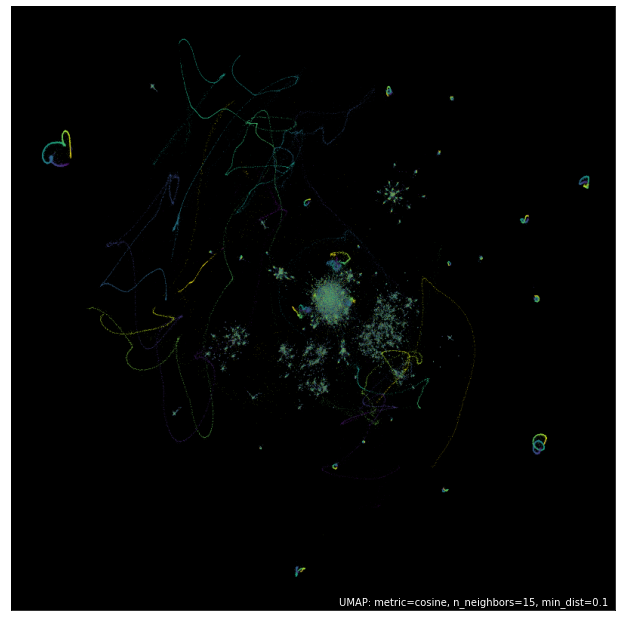

In [49]:
umap.plot.points(mapper, values=np.arange(100000), theme='viridis')

## After model build, more number can be embedded in this space.
### We generate space in 2-110000 prime, but use only2-10000. 100000-110000 Data here have all zero column.
### But it still work.

In [51]:
%%time
# represent these number in space before.
lil_matrix_rows = []
lil_matrix_data = []
for n in range(100000, 110000):
    prime_factors = sympy.primefactors(n)
    lil_matrix_rows.append([prime_to_column[p] for p in prime_factors])
    lil_matrix_data.append([1] * len(prime_factors))
new_data = scipy.sparse.lil_matrix((len(lil_matrix_rows), len(primes)), dtype=np.float32)
new_data.rows = np.array(lil_matrix_rows,dtype=object)
new_data.data = np.array(lil_matrix_data,dtype=object)
new_data

CPU times: total: 219 ms
Wall time: 211 ms


<10000x10453 sparse matrix of type '<class 'numpy.float32'>'
	with 27592 stored elements in List of Lists format>

In [52]:
# embed these numbers with previous trained data.
new_data_embedding = mapper.transform(new_data)

D:\ZR\Anaconda\envs\caiman\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


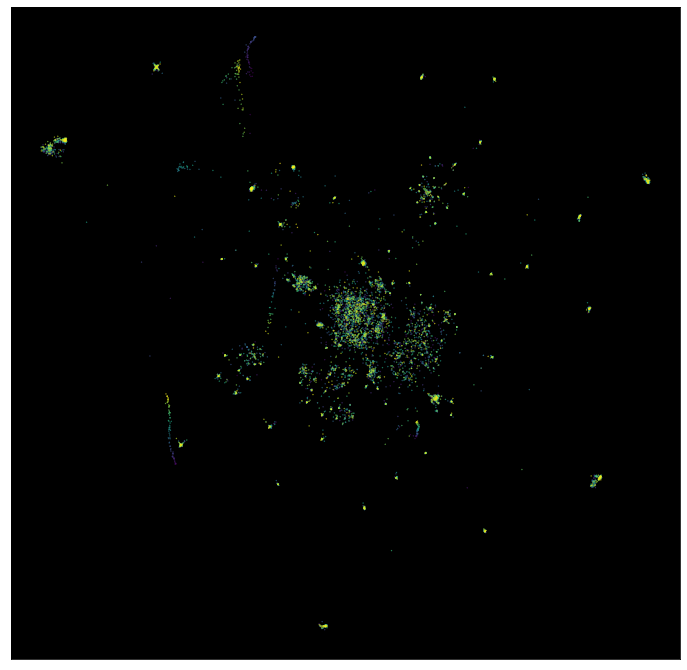

In [53]:
# Still we can plot these numbers.
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
plt.scatter(new_data_embedding[:, 0], new_data_embedding[:, 1], s=0.1, c=np.arange(10000), cmap='viridis')
ax.set(xticks=[], yticks=[], facecolor='black');